1. Что такое ML, виды ML.
2. Задачи ML, примеры, виды задач, проблемы
3. Сбор и подготовка данных
4. Обучение модели
5. Тестирование для проверки качества

Импорт необходимых для работы библиотек и функций

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# Машинное обучение 

Область искусственного интеллекта (ИИ), которая позволяет компьютерам обучаться на данных без явного программирования. В процессе машинного обучения определенный алгоритм нацелен на поиск закономерностей в данных и нахождение оптимальных параметров для модели. Таким образом, модель, обучившись на большом массиве данных, может решать аналогичную задачу самостоятельно.

Виды машинного обучения:
1. Обучение с учителем (Supervised learning) - способ машинного обучения, когда в обучающем датасете для каждого объекта существуют метки (классы или значения) и обучение происходит на заранее размеченных данных
2. Обучение без учителя (Unsupervised learning) - способ машинного обучения, когда в обучающем датасете для каждого объекта существуют только описания без меток, а процессом обучения считается поиск взаимосвязей и зависимостей между объектами

# Задачи машинного обучения

В наши дни машинное обучение применяется практически в любой сфере нашей жизни, каждый день человек сталкивается с ситуациями, где машинное обучение помогает решать множество рутинных задач.

Примеры задач машинного обучения:
- Медицинская диагностика
- Кредитный скоринг
- Прогнозирование стоимости недвижимости
- Поиск аномалий в данных
- Кластеризация
- Рекомендательные системы
- Работа с текстами и изображениями и т.д.

Виды задач машинного обучения:
1. Задача регрессии - задача обучения с учителем, где необходимо спрогнозировать вещественное значение
2. Задача классификации - задача обучения с учителем, где необходимо прогнозировать к какому классу (из конечного количества классов) относится объект, то есть предсказать метку класса
3. Задача кластеризации - задача обучения без учителя, где необходимо разделить набор данных на кластеры таким образом, чтобы свойства объектов одного кластера были похожи между собой и отличались от свойств объектов других кластеров




## Задача регрессии

Задача: предсказать цены на жилье в Бостоне (количественную переменную)

Признаки: уровень преступности на душу населения, число комнат в квартире, индекс доступности к автомагистралям, ставка налога на имущество и др., всего 13

Импортируем датасет load_boston из библиотеки sklearn

In [2]:
from sklearn.datasets import load_boston

Сохраним датасет в переменную data

In [3]:
data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Выведем описание датасета

In [4]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Выведем признаки

In [5]:
data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

Выведем названия признаков

In [6]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Выведем целевой признак

In [7]:
data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Объединим матрицу признаков (data.data) и вектор целевой переменной (data.target) в один датафрейм

In [8]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

Отобразим первые 10 строк датафрейма

In [9]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


Проверим столбцы на наличие пропусков

In [10]:
df.isna().mean()

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
target     0.0
dtype: float64

Пропусков нет

Запишем признаки в переменную X, целевой признак в переменную y

In [11]:
X = df.drop('target', axis=1)
y = data.target

Разделим датафрейм на обучающую и тестовую выборки в соотношении 70%:30%

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=0)

Инициализируем StandardScaler() для ремасштабирования количественных признаков

In [13]:
scaler = StandardScaler()

Обучим скейлер только на обучающей выборке

In [14]:
scaler.fit(X_train)

StandardScaler()

Ремасштабируем признаки

In [15]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Выведем матрицу признаков после ремасштабирования

In [16]:
pd.DataFrame(X_train, columns=data.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.207356,-0.499979,1.548016,-0.263603,0.588213,-1.839367,1.107402,-1.125110,-0.618160,0.206735,1.227257,0.424543,3.108073
1,-0.388865,0.346774,-0.589747,-0.263603,-0.797821,0.327487,-0.367661,0.075090,-0.733637,-1.049493,0.056963,0.401853,-0.666430
2,-0.335735,-0.499979,1.548016,-0.263603,0.588213,0.037907,1.043114,-0.799984,-0.618160,0.206735,1.227257,0.398461,0.639367
3,-0.394852,2.463658,-1.265584,-0.263603,-1.352235,0.052172,-1.746292,1.968937,-0.502683,-0.257013,-1.653466,0.089342,-1.056896
4,-0.391456,-0.499979,2.086394,-0.263603,0.215716,-0.495604,0.853820,-0.811511,-0.849114,-1.254951,0.282020,0.204545,0.776596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,-0.368566,-0.499979,-0.529609,-0.263603,-0.546603,-0.856509,0.189506,0.464292,-0.502683,-0.673799,0.507076,0.357058,-0.099123
350,-0.392217,1.405216,-1.093761,-0.263603,-1.031715,1.240447,-1.524854,1.316070,-0.502683,-0.022204,-1.473421,0.349573,-1.353990
351,-0.384504,-0.499979,-0.153031,-0.263603,-0.078816,-0.410014,0.485947,-0.491616,-0.387206,0.177384,-0.303127,0.396590,-0.302844
352,-0.375118,-0.499979,-0.596907,-0.263603,-0.936425,-0.397176,0.589523,0.933261,-0.733637,-0.990791,-0.258116,0.375888,0.899677


Сохраним экземпляр модели линейной регрессии в переменную model.

In [17]:
model = LinearRegression()

Для обучения модели необходимо вызвать метод fit и передать в аргументах признаки, на которых модель должна обучиться, и правильные ответы

In [18]:
model.fit(X_train, y_train)

LinearRegression()

Для получения предсказаний модели на тестовой выборке необходимо вызвать метод predict и передать признаки тестовой выборки. Предсказания модели сохраним в переменную y_pred и выведем на экран

In [19]:
y_pred = model.predict(X_test)
y_pred

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

### Модель линейной регрессии

В модели линейной регрессии предсказание записывается в виде линейной функции признаков:

$$
y = w_1 \cdot x_1 + w_2 \cdot x_2 + ... + w_n \cdot x_n + w_0
$$
где y - целевая переменная (таргет),

(x_1, x_2, ..., x_n) - вектор, соответствующий объекту выборки (вектор признаков),

(w_1, w_2, ..., w_n) - параметры модели (вектор весов),

w_0 - свободный коэффициент (сдвиг).

Более компактно линейную модель можно записать в виде:
$$
y = (X, w) + w_0
$$
где y - вектор целевой переменной,

(X, w) - скалярное произведение вектора весов на матрицу признаков,

w_0 - свободный коэффициент (сдвиг).

Обучение модели линейной регрессии сводится к поиску весов, при которых достигается минимум функции потерь (ошибки модели минимальны). Вектор весов, при которых ошибки минимальны, вычисляется следующим образом:
$$
w = (X^{T}X)^{-1}X^{T}y
$$

Создадим класс модели линейной регрессии с методами fit для обучения на обучающей выборке и predict для получения предсказаний на тестовой выборке.

In [20]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T @ X) @ (X.T) @ y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Чтобы каждый раз не тратить время на создание простых моделей, инженеры машинного обучения используют классы моделей из библиотеки sklearn.

### Оценка качества модели в задачах регрессии

Наиболее типичными мерами качества в задачах регрессии являются:
- MSE (Mean Squared Error, Средняя квадратичная ошибка)
- MAE (Mean Absolute Error, Средняя абсолютная ошибка)
- R2 (Коэффициент детерминации)
- MAPE (Mean Absolute Percentage Error, Средняя абсолютная процентная ошибка)
- RMSE (Root Mean Squared Error, Корень из средней квадратичной ошибки)

#### MSE (Средняя квадратичная ошибка)
$$
MSE = \frac{1}{N} \sum_{i=1}^{N} (y_{true\;i} - y_{pred\;i})^{2}
$$

MSE применяется в ситуациях, когда необходимо подчеркнуть большие ошибки и выбрать модель, которая дает меньше больших ошибок прогноза. Грубые ошибки становятся заметнее за счет того, что ошибка прогноза возводится в квадрат.Среднеквадратичная ошибка подходит для сравнения моделей или для контроля качества во время обучения, но не позволяет сделать выводов насколько хорошо данная модель решает задачу.

In [21]:
mean_squared_error(y_test, y_pred)

27.195965766883212

#### MAE (Средняя абсолютная ошибка)
$$
MAE = \frac{1}{N} \sum_{i=1}^{N} |y_{true\;i} - y_{pred\;i}|
$$

Функция среднеабсолютной ошибки меньше штрафует за большие отклонения по сравнению со среднеквадратичной ошибкой и поэтому менее чувствительна к выбросам.

In [22]:
mean_absolute_error(y_test, y_pred)

3.6099040603818127

#### R2 (Коэффициент детерминации)
$$
R^{2} = 1 - \frac{\sum_{i=1}^{N} (y_{true\;i} - y_{pred\;i})^{2}}{\sum_{i=1}^{N} (y_{true\;i} - \bar{y})^{2}}
$$

Коэффициент детерминации измеряет долю дисперсии, объясненную моделью, в общей дисперсии целевой переменной. Фактически, данная мера качества — это нормированная среднеквадратичная ошибка. Если она близка к единице, то модель хорошо объясняет данные, если же она близка к нулю, то прогнозы сопоставимы по качеству с константным предсказанием.

In [23]:
r2_score(y_test, y_pred)

0.6733825506400195

#### MAPE (Средняя абсолютная процентная ошибка)
$$
MAPE = \frac{1}{N} \sum_{i=1}^{N} \frac{|y_{true\;i} - y_{pred\;i}|}{|y_{true\;i}|} \cdot 100\%
$$

Коэффициент, не имеющий размерности, с очень простой интерпретацией. Его можно измерять в долях или процентах. Если у вас получилось, например, что MAPE=11.4%, то это говорит о том, что ошибка составила 11,4% от фактических значений. Основная проблема данной ошибки — нестабильность.

In [24]:
mean_absolute_percentage_error(y_test, y_pred)

0.1811804728842403

#### RMSE (Корень из средней квадратичной ошибки)
$$
RMSE = \sqrt{MSE} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_{true\;i} - y_{pred\;i})^{2}}
$$

Чтобы ошибка MSE имела размерность исходных данных, из нее извлекают квадратный корень и получают показатель RMSE. Примерно такая же проблема, как и в MAPE: так как каждое отклонение возводится в квадрат, любое небольшое отклонение может значительно повлиять на показатель ошибки.

In [25]:
mean_squared_error(y_test, y_pred)**0.5

5.214975145375403

## Задача классификации

Задача: предсказать рак молочной железы у пациентов (категориальную переменную)

У пациентов с злокачественной опухолью (рак есть) метка 1, у пациентов с доброкачественной опухолью (рака нет) метка 0

Импортируем датасет load_breast_cancer из библиотеки sklearn

In [26]:
from sklearn.datasets import load_breast_cancer

Сохраним датасет в переменную data

In [27]:
data = load_breast_cancer()

Выведем описание датасета

In [28]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Объединим матрицу признаков и вектор целевой переменной в один датафрейм

In [29]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

Выведем первые 10 строк

In [30]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


Проверим столбцы на наличие пропусков

In [31]:
df.isna().mean()

mean radius                0.0
mean texture               0.0
mean perimeter             0.0
mean area                  0.0
mean smoothness            0.0
mean compactness           0.0
mean concavity             0.0
mean concave points        0.0
mean symmetry              0.0
mean fractal dimension     0.0
radius error               0.0
texture error              0.0
perimeter error            0.0
area error                 0.0
smoothness error           0.0
compactness error          0.0
concavity error            0.0
concave points error       0.0
symmetry error             0.0
fractal dimension error    0.0
worst radius               0.0
worst texture              0.0
worst perimeter            0.0
worst area                 0.0
worst smoothness           0.0
worst compactness          0.0
worst concavity            0.0
worst concave points       0.0
worst symmetry             0.0
worst fractal dimension    0.0
target                     0.0
dtype: float64

Пропусков нет

Проверим баланс классов

In [32]:
df['target'].value_counts(normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

Присутствует дисбаланс классов (пациентов с злокачественной опухолью больше, чем с доброкачественной). Чтобы учесть дисбаланс классов, при разделении датафрейма на обучающую и тестовую выборки можно задать параметр stratify.

Запишем признаки в переменную X, целевой признак в переменную y

In [33]:
X = df.drop('target', axis=1)
y = data.target

Разделим датафрейм на обучающую и тестовую выборки в соотношении 70%:30%

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5, stratify=y)

Инициализируем StandardScaler() для ремасштабирования количественных признаков

In [35]:
scaler = StandardScaler()

Обучим скейлер только на обучающей выборке

In [36]:
scaler.fit(X_train)

StandardScaler()

Ремасштабируем признаки

In [37]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Выведем матрицу признаков после ремасштабирования

In [38]:
pd.DataFrame(X_train, columns=data.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.705242,-0.266998,-0.730084,-0.659447,0.283333,-0.858500,-0.793430,-0.369224,-0.670012,0.032241,...,-0.623206,-0.350128,-0.675999,-0.579646,-0.782376,-1.092989,-1.019854,-0.674841,-1.416699,-0.780716
1,-0.573635,0.187495,-0.544195,-0.596871,1.012021,0.227352,-0.088951,-0.722644,1.171042,0.878504,...,-0.664546,-0.221572,-0.675101,-0.645366,0.395174,-0.112375,0.423812,-0.528192,-0.251553,0.257527
2,0.516416,-0.896110,0.550761,0.370508,-0.067054,0.651543,0.407008,0.554542,-0.075771,-0.401346,...,0.492983,-0.582517,0.497093,0.306447,0.541813,1.285271,1.125641,1.324194,0.242558,0.411321
3,-1.151563,-0.424874,-1.143864,-0.972046,-1.122623,-0.859856,-0.397048,-1.009520,0.587738,0.071278,...,-1.011805,-0.172128,-0.966279,-0.836861,-1.601329,-0.705551,-0.371365,-1.241998,0.001878,-0.298289
4,1.815322,-0.355504,1.677739,1.886002,-0.814106,-0.480796,-0.022866,0.548255,0.033599,-0.832146,...,1.780734,-0.346832,1.529534,1.826740,-0.333574,-0.402501,-0.128861,1.132982,-0.186203,0.291523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-0.845433,-0.898502,-0.797453,-0.770663,-0.894173,0.153748,0.154216,-0.567810,0.026307,1.377617,...,-0.896052,-1.085202,-0.836700,-0.757414,-0.937902,0.206828,0.169948,-0.499116,-1.131390,1.116074
394,-0.565052,-0.314839,-0.594098,-0.576391,-0.681884,-0.710324,-0.639446,-0.679416,0.609612,-0.050015,...,-0.575665,-0.048517,-0.631110,-0.561458,-0.426889,-0.452902,-0.362475,-0.508755,0.392386,-0.123990
395,-1.137257,-0.735842,-1.082733,-0.963513,0.754923,0.147937,-0.274887,-0.251330,-0.217951,1.415260,...,-1.053146,-0.808313,-1.082092,-0.859682,0.395174,-0.083298,-0.384700,-0.266501,-0.412538,0.723225
396,0.010014,0.094204,0.219322,-0.093982,-1.282023,2.321191,2.715494,0.752866,-0.360132,2.098404,...,-0.222205,-0.294091,-0.020623,-0.312995,-1.858168,1.101115,2.027994,0.571988,-0.747258,1.326528


Создадим экземпляр модели логистической регрессии

In [39]:
model = LogisticRegression()

Обучим модель на обучающей выборке

In [40]:
model.fit(X_train, y_train)

LogisticRegression()

Предсказания модели сохраним в переменную y_pred и выведем на экран

In [41]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0])

### Оценка качества модели в задачах классификации

#### Матрица ошибок

В задаче бинарной классификации возможны 4 исхода:
1. Объекту положительного класса предсказан положительный класс (TP - True Positive)
2. Объекту отрицательного класса предсказан положительный класс (FP - False Positive)
3. Объекту отрицательного класса предсказан отрицательный класс (TN - True Negative)
4. Объекту положительного класса предсказан отрицательный класс (FN - False Negative)

Для удобства эти 4 числа изображают в виде таблицы, которую называют матрицей ошибок
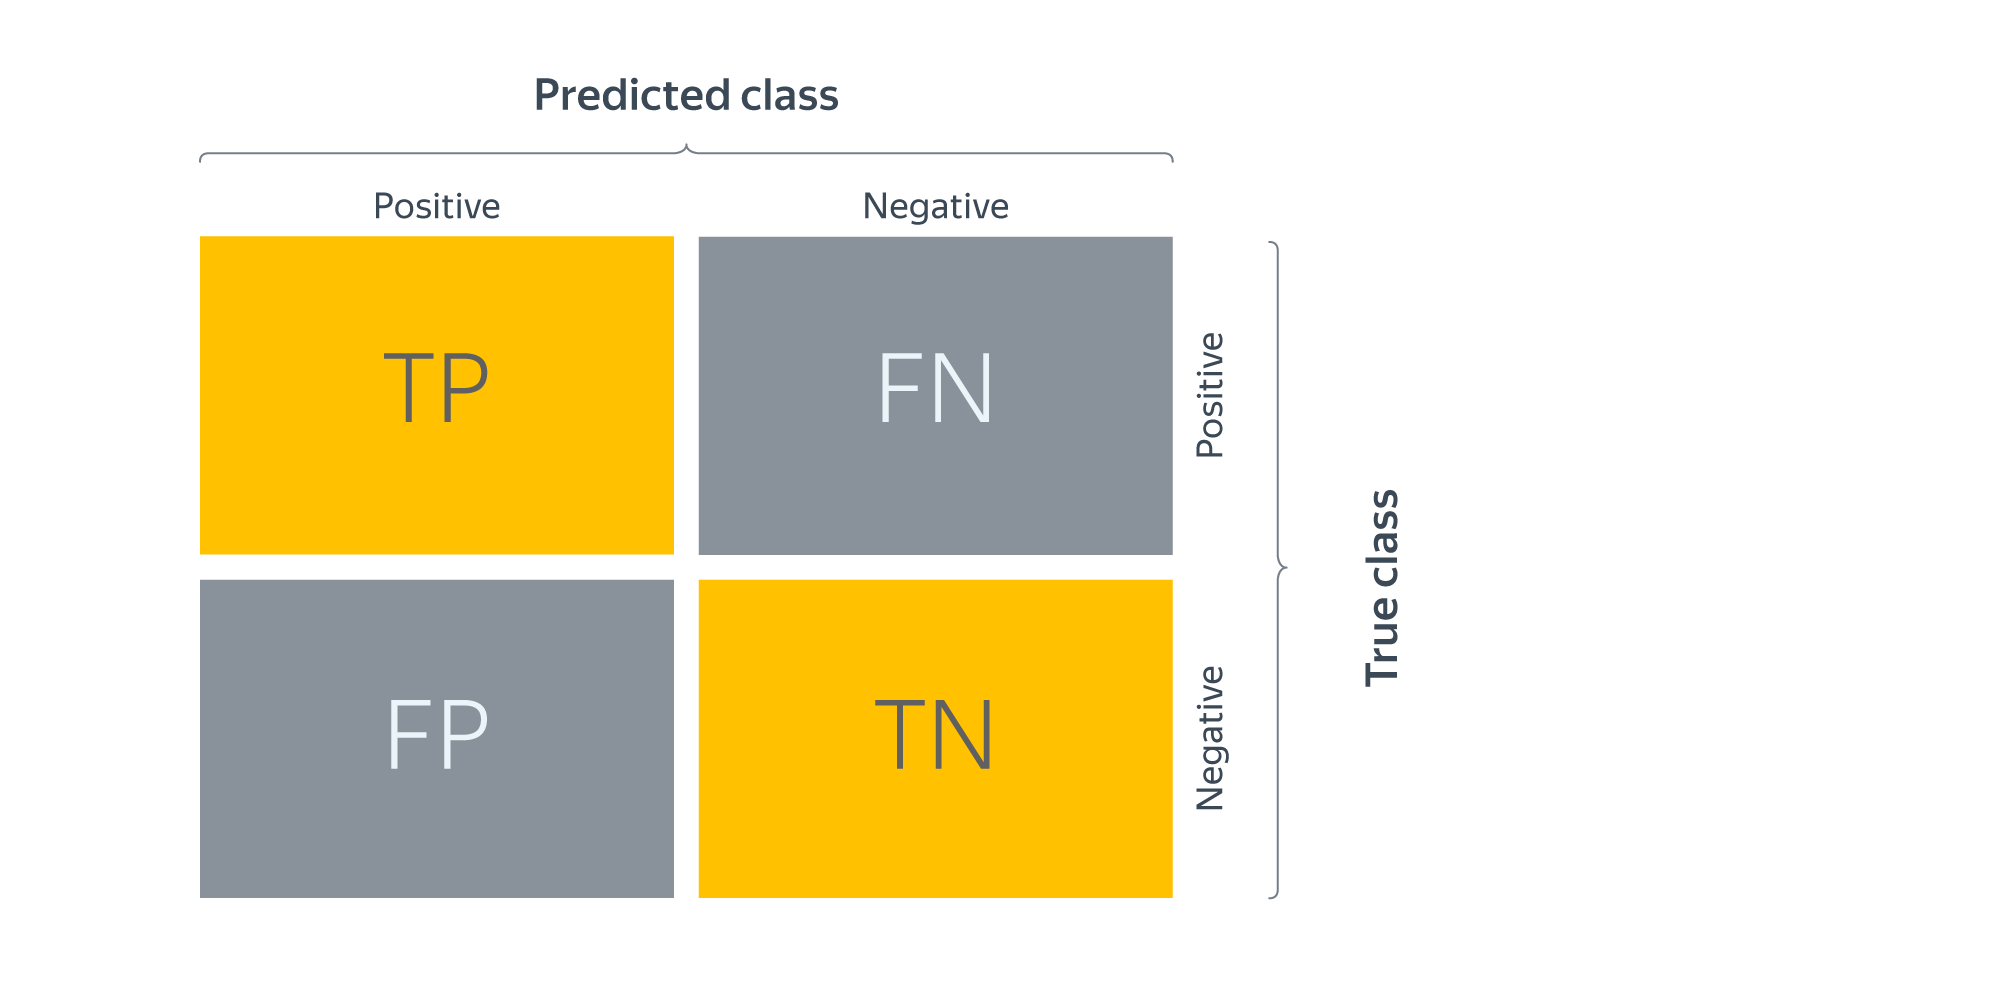

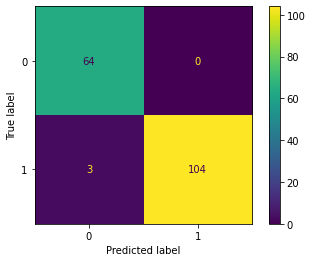

In [42]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

#### Accuracy

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

Метрика accuracy - доля правильных ответов модели. Эта метрика используется редко, так как дает обманчивые результаты на несбалансированных выборках.

In [43]:
accuracy_score(y_test, y_pred)

0.9824561403508771

#### Precision (точность)

$$
Precision = \frac{TP}{TP + FP}
$$

Precision - доля истинноположительных ответов среди всех положительных предсказаний модели. Чем меньше ложноположительных ответов будет давать модель, тем больше будет ее точность.

In [44]:
precision_score(y_test, y_pred)

1.0

#### Recall (полнота)

$$
Recall = \frac{TP}{TP + FN}
$$

Recall - доля истинноположительных ответов среди всех объектов положительного класса. Чем меньше ложноотрицательных ответов будет давать модель, тем больше будет ее полнота.

In [45]:
recall_score(y_test, y_pred)

0.9719626168224299

#### F1-мера

$$
F1 = \frac{2}{\frac{1}{Recall} + \frac{1}{Precision}} = \frac{2 \cdot Recall \cdot Precision}{Recall + Precision}
$$

F1-мера - среднее гармоническое recall и precision. Максимальное значение F1-меры равно единице, когда precision и recall равны единице, а наименьшее возможное значение равно 0, если либо precision, либо recall равны нулю.

In [46]:
f1_score(y_test, y_pred)

0.985781990521327

Для создания отчета по классам можно воспользоваться функцией classification_report.

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        64
           1       1.00      0.97      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.99      0.98       171
weighted avg       0.98      0.98      0.98       171

